<a href="https://colab.research.google.com/github/pydeoxy/pytorch-test/blob/main/pytorch_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
# Create a model class inherites nn.Module
class Model(nn.Module):
  # input layer
  # hidden layers
  # output layer
  def __init__(self, in_features=4, h1=10, h2=10, h3=10, out_features=3):
    super().__init__() # iniate nn.Module
    self.fc1 = nn.Linear(in_features,h1) # fc: fully connected
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.out = nn.Linear(h3, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.out(x)

    return x



In [ ]:
# Pick a random seed for randomization
torch.manual_seed(64)
# Create an instance of the model
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)

In [ ]:
# Train Test split, set X, y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [ ]:
# Convert to numpy array
X = X.values
y = y.values


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

In [ ]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# Convert y features to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Set the criterion to measure the loss
criterion = nn.CrossEntropyLoss()
# Chose the Optimizer, learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [ ]:
# Train the model
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train) # get prediction
  loss = criterion(y_pred, y_train) # measure the losses
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch {i} and loss {loss}')

  # back propagation to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




Epoch 0 and loss 1.1457175016403198
Epoch 10 and loss 0.9966328144073486
Epoch 20 and loss 0.7642038464546204
Epoch 30 and loss 0.4755209684371948
Epoch 40 and loss 0.25296884775161743
Epoch 50 and loss 0.10345979034900665
Epoch 60 and loss 0.05497412011027336
Epoch 70 and loss 0.04302547872066498
Epoch 80 and loss 0.035975854843854904
Epoch 90 and loss 0.03396879509091377


Text(0.5, 0, 'Epoch')

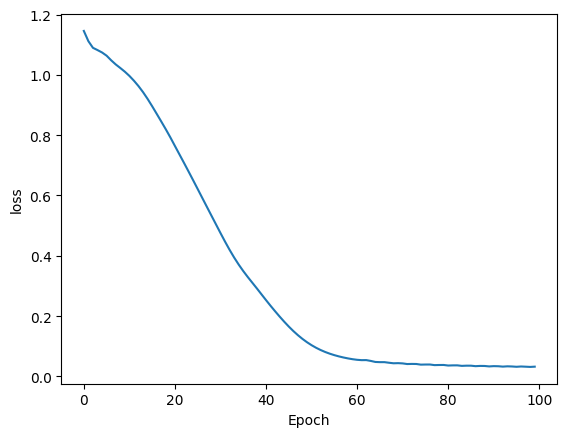

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('Epoch')

In [ ]:
# Evaluate model on test dataset
with torch.no_grad(): # turn of propagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [ ]:
# Predict with new data
new_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

with torch.no_grad():
  print(model(new_iris))

tensor([-13.0041,   4.5117,   9.8854])


In [ ]:
# Save the NN model
torch.save(model.state_dict(), 'my_iris_model.pt')


In [ ]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)